In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing


In [3]:

# Load the Boston Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target


In [10]:
# Create a DataFrame for better visualization
columns = data.feature_names
df = pd.DataFrame(X, columns=columns)
df['MEDV'] = y  # Median value of owner-occupied homes in $1000s


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Create a Linear Regression model
regression = LinearRegression()

# Fit the model to the training data
regression.fit(X_train, y_train)

# Make predictions on the test set
reg_pred_test = regression.predict(X_test)


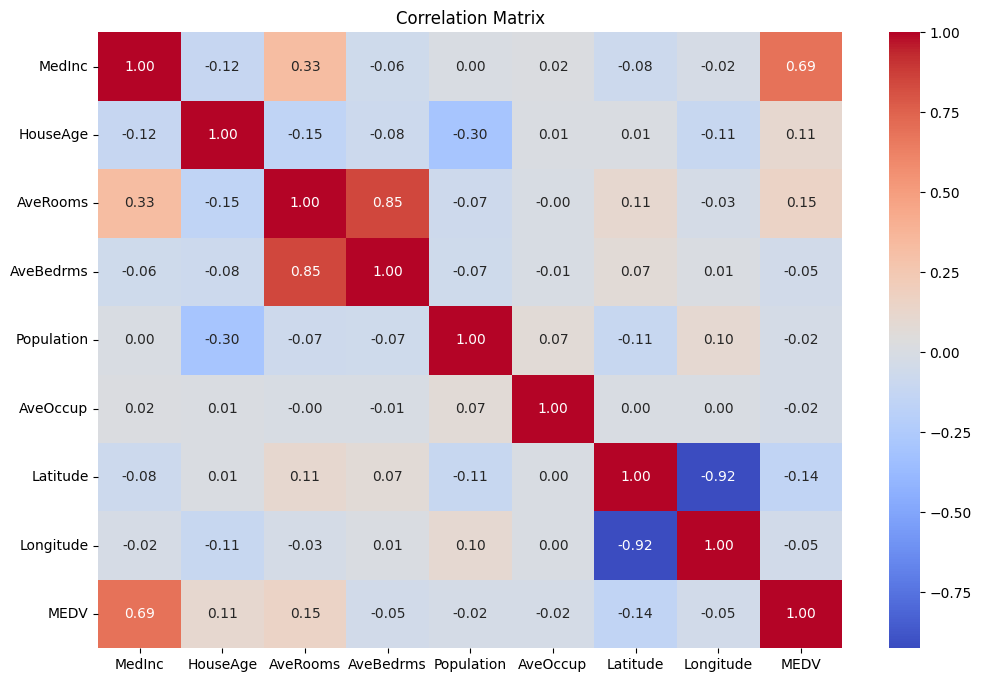

In [7]:
# Visualize the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [11]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [8]:

# Evaluate the model
mse = mean_squared_error(y_test, reg_pred_test)
print(f"Mean Squared Error on Test Data: {mse}")


Mean Squared Error on Test Data: 0.5558915986952422


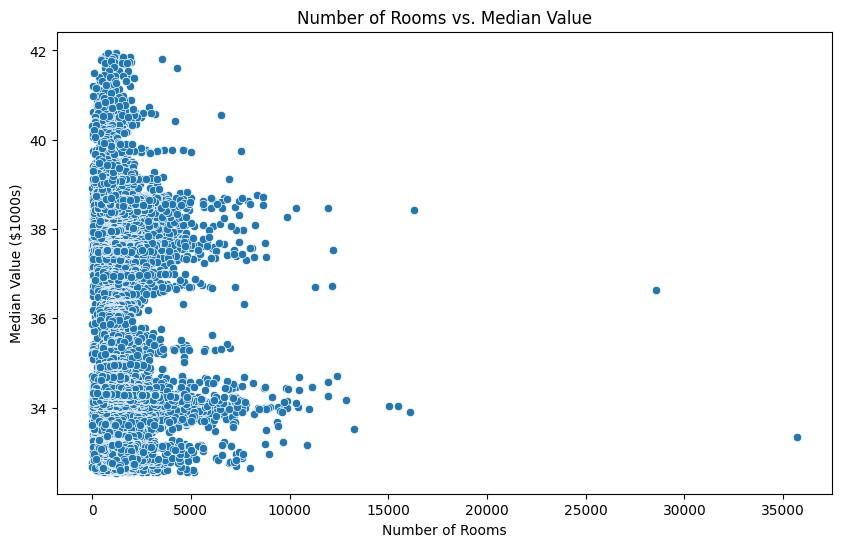

In [15]:

# Select a feature with a high correlation with the target variable (e.g., 'RM')
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Population'], y=df['Latitude'])
plt.title('Number of Rooms vs. Median Value')
plt.xlabel('Number of Rooms')
plt.ylabel('Median Value ($1000s)')
plt.show()



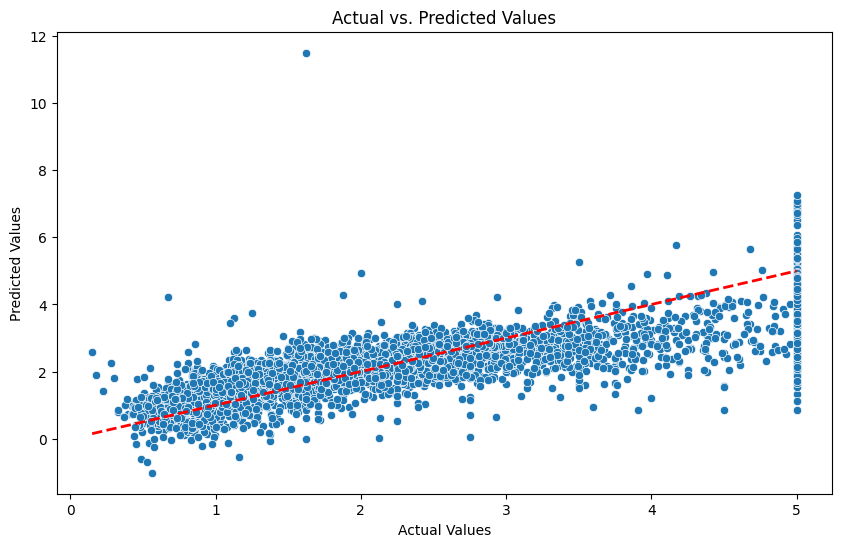

In [16]:

# Visualize the predicted vs. actual values on the test set
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=reg_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


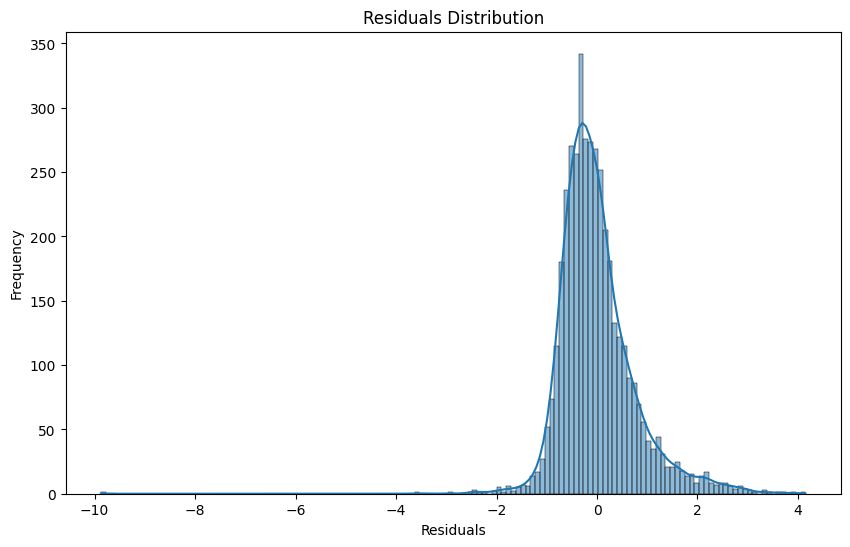

In [17]:
# Visualize the residuals (difference between actual and predicted values)
residuals = y_test - reg_pred_test
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
